Missing Values:
 name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64


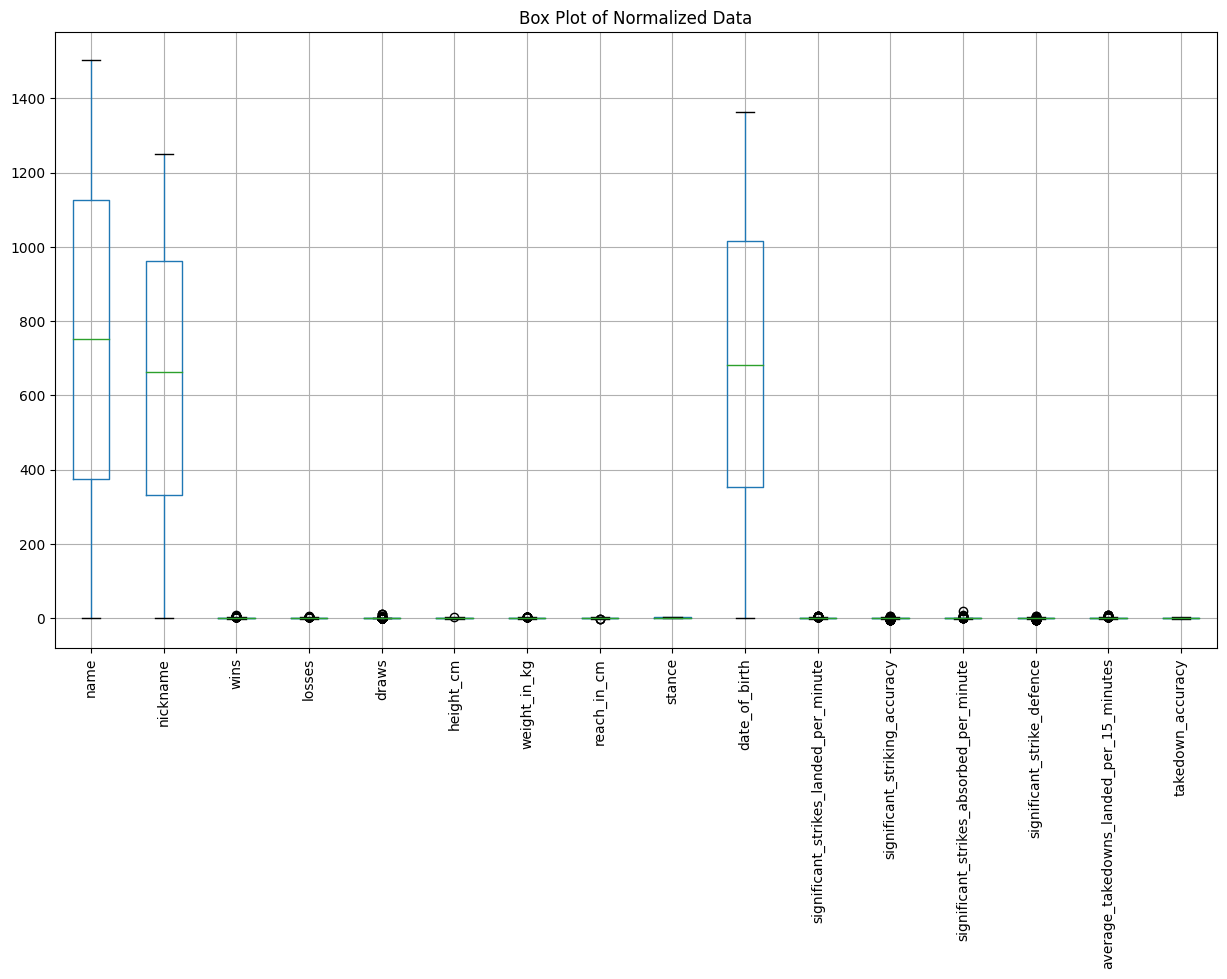

Correlation Matrix:
                                                   name  nickname      wins  \
name                                          1.000000  0.063377 -0.025340   
nickname                                      0.063377  1.000000  0.009101   
wins                                         -0.025340  0.009101  1.000000   
losses                                       -0.022382  0.051134  0.714577   
draws                                        -0.000479  0.019003  0.284830   
height_cm                                    -0.008575  0.016233  0.130883   
weight_in_kg                                 -0.024484  0.015037  0.156854   
reach_in_cm                                  -0.028162  0.008945  0.143481   
stance                                        0.029121 -0.001668 -0.079089   
date_of_birth                                 0.012937 -0.048471 -0.416156   
significant_strikes_landed_per_minute        -0.024643 -0.048536 -0.081047   
significant_striking_accuracy              

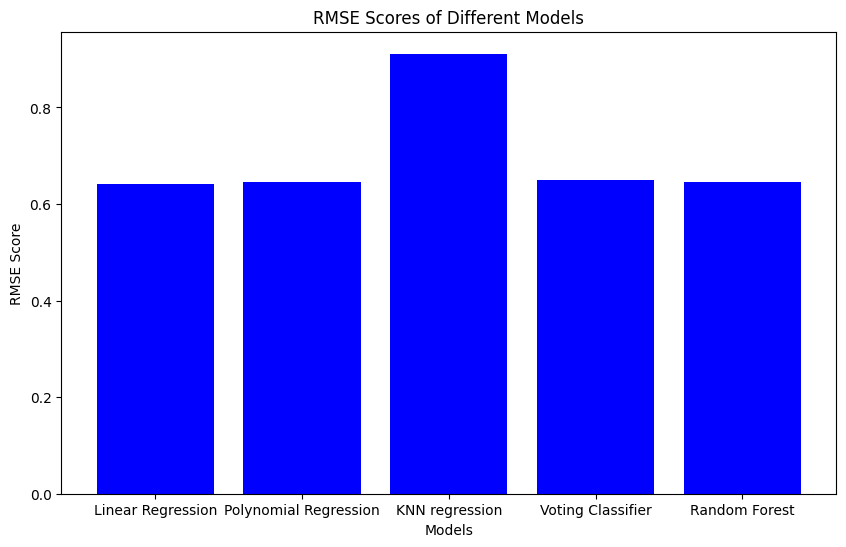

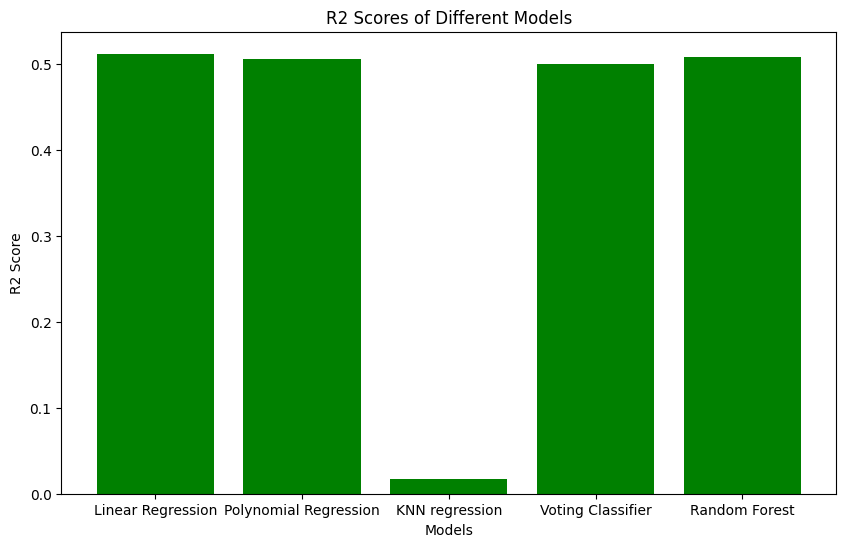

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
import seaborn as sns

# Load the dataset
data = pd.read_csv("regression_fighters.csv")
data.head()

# Missing value analysis
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna()

# Normalization 
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.head()

# Encoding
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

# Outlier analysis - Box plot
data_normalized_df = pd.DataFrame(data, columns=data.columns[:-2])  # Exclude Geography and binnedInc
data_normalized_df.boxplot(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title("Box Plot of Normalized Data")
plt.show()

# Split the data into train and test sets
X = data.drop(columns=["wins"])
y = data["wins"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linearity analysis
dfx = pd.DataFrame(X, columns=data.columns[:-1]) # Excluding the target column

correlation_matrix = dfx.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression RMSE:", rmse_linear)
print("Linear Regression R2 Score:", r2_linear)

#polynomial regression
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R2 Score:", r2_poly)



# K-Nearest Neighbors Regression
k = 5  # Choose the number of neighbors
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Regression RMSE:", rmse_knn)
print("K-Nearest Neighbors Regression R2 Score:", r2_knn)

# Ensemble using Voting Regressor
voting_regressor = VotingRegressor(estimators=[('linear', linear_reg), ('polynomial', poly_reg), ('KNN', knn_reg)])
voting_regressor.fit(X_train, y_train)
y_pred_voting = voting_regressor.predict(X_test)
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
r2_voting = r2_score(y_test, y_pred_voting)
print("Voting Regressor RMSE:", rmse_voting)
print("Voting Regressor R2 Score:", r2_voting)

# Inbuilt Ensemble Model - Random Forest Regressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor RMSE:", rmse_rf)
print("Random Forest Regressor R2 Score:", r2_rf)

# Plot RMSE and R2 scores
models = ['Linear Regression', 'Polynomial Regression', 'KNN regression', 'Voting Classifier', 'Random Forest']
rmse_scores = [rmse_linear, rmse_poly, rmse_knn, rmse_voting, rmse_rf]
r2_scores = [r2_linear, r2_poly, r2_knn , r2_voting, r2_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('RMSE Scores of Different Models')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='green')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores of Different Models')
plt.show()
